In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import random 

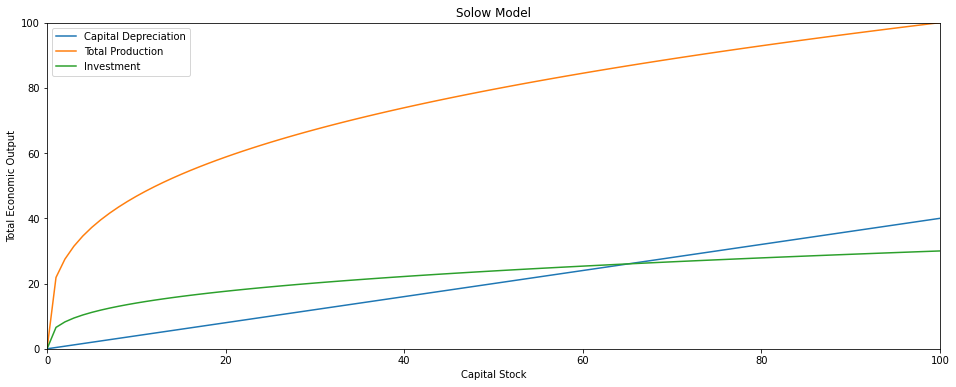

In [6]:
# WS-PS Model 
#Equilibrium output 
#A = technology, K = capital, E = labour, e = exponent 

def production_function(productivity,capital,labour,exponent): #assume Cobb-Douglass
    return productivity*(capital**exponent)*(labour**(1-exponent))

def capital_depreciation(capital_stock, depreciation_rate):
    return capital_stock * depreciation_rate

def investment_rate(savings_rate,total_output):
    return total_output * savings_rate 

def capital_accumulation(savings_rate, total_output, capital_stock, depreciation_rate):
    updated_capital_Stock = savings_rate*total_output - capital_depreciation(capital_stock,depreciation_rate)
    return updated_capital_Stock

def plot_capital_depreciation(depreciation_rate):
    capital_depreciation_line = []
    for capital_stock in range(0,101):
        capital_depreciation_line.append(capital_depreciation(capital_stock,depreciation_rate)) #rate% depreciation 
    plt.plot(capital_depreciation_line,label='Capital Depreciation')

def plot_production_function(exponent):
    total_production = []
    labour = 100
    for capital_stock in range(0,101):
        total_production.append(production_function(1.0,capital_stock,labour,exponent))
    return total_production

def plot_capital_investment(savings_rate):
    investments = []
    for val in plot_production_function(0.33):
        investments.append(investment_rate(savings_rate,val))
    plt.plot(investments, label='Investment')
        

plt.figure(figsize=(16, 6))
plt.xlabel("Capital Stock")
plt.ylabel("Total Economic Output")
plt.title("Solow Model")
axes = plt.gca()
axes.set_xlim([0, 100])
axes.set_ylim([0, 100])
plot_capital_depreciation(0.4)
plt.plot(plot_production_function(0.33),label='Total Production')
plot_capital_investment(0.3)
plt.legend()
plt.savefig("Diagrams/Solow_Model.png")
plt.show()

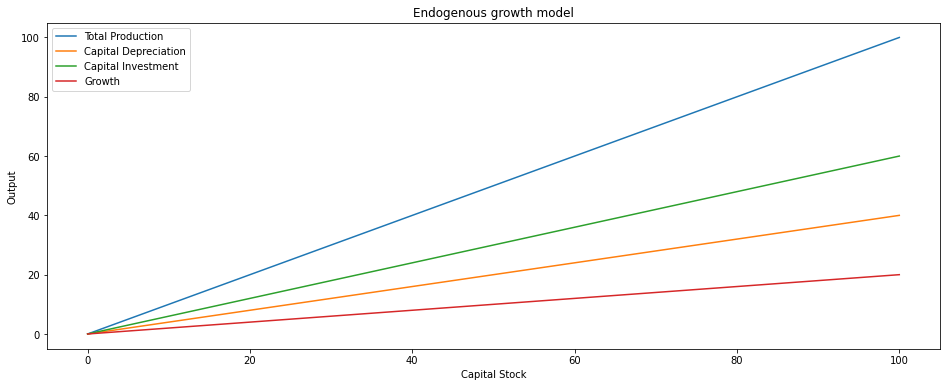

In [17]:
def total_output(capital_vals, capital_productivity):
    output_schedule = []
    for val in capital_vals:
        output_schedule.append(val * capital_productivity)
    return output_schedule

def investment(capital_vals, capital_productivity, savings_rate):
    vals = total_output(capital_vals, capital_productivity)
    investment_schedule = []
    for val in vals:
        investment_schedule.append(val*savings_rate)
    return investment_schedule 
                               
def depreciation(capital_vals, depreciation_rate):
    depreciation_schedule = []
    for capital_val in capital_vals:
        depreciation_schedule.append(capital_val * depreciation_rate)
    return depreciation_schedule

def growth(investment_schedule,depreciation_schedule):
    growth_schedule = [] 
    for pos_1, val_1 in enumerate(investment_schedule):
        for pos_2, val_2 in enumerate(depreciation_schedule):
            if pos_1 == pos_2:
                growth = val_1-val_2
                growth_schedule.append(growth)
    return growth_schedule 
                
                                     
                               
    
vals = range(0,101)
capital_productivity = 1
savings_rate = 0.6 #40%
depreciation_rate = 0.4 #30%


plt.figure(figsize=(16,6))
plt.title("Endogenous growth model")
plt.xlabel("Capital Stock")
plt.ylabel("Output")

schedule = total_output(vals, capital_productivity)
plt.plot(schedule, label="Total Production")
depreciation_schedule = depreciation(vals, depreciation_rate)
plt.plot(depreciation_schedule, label="Capital Depreciation")
investment_schedule = investment(vals, capital_productivity, savings_rate)
plt.plot(investment_schedule, label="Capital Investment")
growth_schedule = growth(investment_schedule,depreciation_schedule)
plt.plot(growth_schedule,label="Growth")

plt.legend()
plt.show()

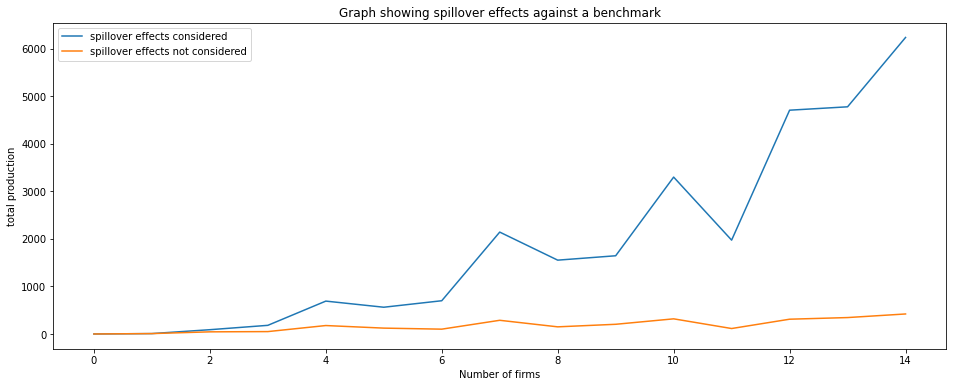

In [93]:

def firm_output(TFP, capital, labour):
    exponent = 0.33
    return TFP * (capital**exponent) * (labour**(1-exponent))


def aggregate_output(firms_list):
    total_productivity = [] 
    total_capital = [] 
    total_labour = []
    firms_list = firms_list.items()
    for firm in firms_list: # dictionary of lists 
        total_productivity.append(firm[1][0])
        total_capital.append(firm[1][1])
        total_labour.append(firm[1][2])
    total_productivity = sum(total_productivity)
   # print(total_productivity)
    total_capital = sum(total_capital)
    #print(total_capital)
    total_labour = sum(total_labour)
   # print(total_labour)
    total_output = total_productivity * (total_capital**0.33) * (total_labour**0.67)
  #  print(len(firms_list),total_output)
    return total_output

def plot_aggregate_output_curves(n):#with synergies/spillovers
    aggregate_output_schedules = [] 
    for val in range(0,n):
        list_vals = create_firms_list(val) # randomly creates a new list for each iteration
        ao = aggregate_output(list_vals)
        so = sum_firms_output(list_vals)
        aggregate_output_schedules.append([ao,so])
    #    print("spillovers:",ao,"; without spillovers:",so)
    return aggregate_output_schedules


def sum_firms_output(firms_list):
    firm_outputs = []
    firms_list = firms_list.items()
    for firm in firms_list:
        firm_outputs.append(firm_output(firm[1][0],firm[1][1],firm[1][2]))
    return sum(firm_outputs) 


        
def create_firms_list(list_length):
    firms_list = {}
    for firm in range(0,list_length):
        firms_list[firm] = [random.random(), random.randint(1,100),random.randint(1,100)]
    return firms_list
    
    
firms_list = create_firms_list(10)
#plot sum of individual outputs against aggregate output(with spilllovers)

n=15#number of firms 
plt.figure(figsize=(16,6))
plt.xlabel("Number of firms")
plt.ylabel("total production")
plt.title("Graph showing spillover effects against a benchmark")


a = plot_aggregate_output_curves(n)
#print(a)
spillovers = [] 
without_spillovers = []
for value in a:
    spillovers.append(value[0])
    without_spillovers.append(value[1])
#print('aggregate output with spillovers',spillovers)
#print('aggregate output without spillovers',without_spillovers)

plt.plot(spillovers, label="spillover effects considered")
plt.plot(without_spillovers, label="spillover effects not considered")
plt.legend()
plt.show()
plt.clf()


In [8]:
#CES Production Function 
#Elasticity of substitution between skilled and non-skilled workers 



def calculate_total_output():
    val_1 = (Productivity_Skilled*Skilled_Labour)**exponent
    val_2 = (Productivity_Unskilled*Unskilled_Labour)**exponent
    return (val_1+val_2)**(1/exponent)

'''
def calculate_wage():
    productivity*()
    
def calculate_skill_premium_from _wages(wage_higher,wage_lower):
    return wage_higher/wage_lower

def calculate_skill_premium()
'''

'\ndef calculate_wage():\n    productivity*()\n    \ndef calculate_skill_premium_from _wages(wage_higher,wage_lower):\n    return wage_higher/wage_lower\n\ndef calculate_skill_premium()\n'

In [5]:

def calculate_productivity_growth_rate(absorptive_capacity,frontier,domestic):
    technology_gap = frontier - domestic 
    return absorptive_capacity*(technology_gap/domestic)